In [1]:
import math

import pandas as pd
import numpy as np

# import raw data
raw = pd.read_csv("Missing_Migrants_Global_Figures_allData_0.csv")

In [2]:
raw.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-110.366453 31.650259),Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-111.73756 31.59713),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,POINT (-113.01125 31.94026),Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",POINT (-109.315632 31.506777),Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),POINT (28 59.1551),Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR


In [3]:
# drop columns we definitely don't use
data = raw.drop(['Main ID','Incident ID','Information Source','Article title','URL'],axis=1)

data.head()

,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Coordinates,UNSD Geographical Grouping,Source Quality
0,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,POINT (-110.366453 31.650259),Northern America,5.0
1,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,POINT (-111.73756 31.59713),Northern America,5.0
2,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,POINT (-113.01125 31.94026),Northern America,5.0
3,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA",POINT (-109.315632 31.506777),Northern America,5.0
4,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,POINT (28 59.1551),Northern Europe,1.0


In [4]:
# summary for now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12398 entries, 0 to 12397
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        12398 non-null  object 
 1   Region of Incident                   12398 non-null  object 
 2   Website Date                         12383 non-null  object 
 3   Incident year                        12398 non-null  int64  
 4   Reported Month                       12398 non-null  object 
 5   Number of Dead                       11893 non-null  float64
 6   Minimum Estimated Number of Missing  1213 non-null   float64
 7   Total Number of Dead and Missing     12398 non-null  int64  
 8   Number of Survivors                  1890 non-null   float64
 9   Number of Females                    2253 non-null   float64
 10  Number of Males                      7650 non-null   float64
 11  Number of Children          

In [5]:
# include only entries for individual incidents
data.drop(data[data['Incident Type']!='Incident'].index,inplace=True)
data.drop(['Incident Type'],axis=1,inplace=True)

data.head()

,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Coordinates,UNSD Geographical Grouping,Source Quality
0,North America,2014-01-06,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,POINT (-110.366453 31.650259),Northern America,5.0
1,North America,2014-01-12,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,POINT (-111.73756 31.59713),Northern America,5.0
2,North America,2014-01-14,2014,January,1.0,NaN,1,NaN,NaN,NaN,NaN,Latin America / Caribbean (P),Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,POINT (-113.01125 31.94026),Northern America,5.0
3,North America,2014-01-16,2014,January,1.0,NaN,1,NaN,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA",POINT (-109.315632 31.506777),Northern America,5.0
4,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,POINT (28 59.1551),Northern Europe,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12072 entries, 0 to 12397
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region of Incident                   12072 non-null  object 
 1   Website Date                         12057 non-null  object 
 2   Incident year                        12072 non-null  int64  
 3   Reported Month                       12072 non-null  object 
 4   Number of Dead                       11612 non-null  float64
 5   Minimum Estimated Number of Missing  1072 non-null   float64
 6   Total Number of Dead and Missing     12072 non-null  int64  
 7   Number of Survivors                  1734 non-null   float64
 8   Number of Females                    2145 non-null   float64
 9   Number of Males                      7466 non-null   float64
 10  Number of Children                   1418 non-null   float64
 11  Region of Origin            

In [7]:
# include only entries with a survivor count
data.dropna(subset=['Number of Survivors'], inplace=True)

# Somehow there can be a negative number of survivors
data.drop(data[data['Number of Survivors'] < 0].index,inplace=True)

data.head()

,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Coordinates,UNSD Geographical Grouping,Source Quality
4,Europe,2014-01-16,2014,January,1.0,0.0,1,2.0,NaN,1.0,NaN,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,POINT (28 59.1551),Northern Europe,1.0
14,Europe,2014-01-30,2014,January,1.0,0.0,1,2.0,NaN,1.0,1.0,Southern Asia,Vehicle accident / death linked to hazardous t...,Iran (Islamic Republic of),English Channel to the UK,France - Calais,POINT (2 50.9355),Western Europe,4.0
17,Mediterranean,2014-02-06,2014,February,15.0,0.0,15,0.0,NaN,1.0,NaN,Unknown,Violence,"Cameroon,Unknown",Western Mediterranean,Ceuta waters,POINT (-5 35.8793),Uncategorized,1.0
21,Mediterranean,2014-02-17,2014,February,2.0,0.0,2,121.0,NaN,2.0,NaN,Eastern Africa,Mixed or unknown,Somalia,Central Mediterranean,Italy waters,POINT (16 34.5645),Uncategorized,1.0
23,North America,2014-02-18,2014,February,1.0,NaN,1,2.0,NaN,1.0,NaN,Central America,Violence,Mexico,US-Mexico border crossing,"California-Mexico border near San Diego, Calif...",POINT (-117 32.5543),Northern America,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region of Incident                   1730 non-null   object 
 1   Website Date                         1730 non-null   object 
 2   Incident year                        1730 non-null   int64  
 3   Reported Month                       1730 non-null   object 
 4   Number of Dead                       1481 non-null   float64
 5   Minimum Estimated Number of Missing  693 non-null    float64
 6   Total Number of Dead and Missing     1730 non-null   int64  
 7   Number of Survivors                  1730 non-null   float64
 8   Number of Females                    454 non-null    float64
 9   Number of Males                      758 non-null    float64
 10  Number of Children                   379 non-null    float64
 11  Region of Origin             

In [9]:
# reselect features we are interested in 1
data.drop(['Number of Dead','Minimum Estimated Number of Missing','Number of Females','Number of Males','Number of Children','Source Quality'],axis=1,inplace=True)

data.head()

,Region of Incident,Website Date,Incident year,Reported Month,Total Number of Dead and Missing,Number of Survivors,Region of Origin,Cause of Death,Country of Origin,Migration route,Location of death,Coordinates,UNSD Geographical Grouping
4,Europe,2014-01-16,2014,January,1,2.0,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,POINT (28 59.1551),Northern Europe
14,Europe,2014-01-30,2014,January,1,2.0,Southern Asia,Vehicle accident / death linked to hazardous t...,Iran (Islamic Republic of),English Channel to the UK,France - Calais,POINT (2 50.9355),Western Europe
17,Mediterranean,2014-02-06,2014,February,15,0.0,Unknown,Violence,"Cameroon,Unknown",Western Mediterranean,Ceuta waters,POINT (-5 35.8793),Uncategorized
21,Mediterranean,2014-02-17,2014,February,2,121.0,Eastern Africa,Mixed or unknown,Somalia,Central Mediterranean,Italy waters,POINT (16 34.5645),Uncategorized
23,North America,2014-02-18,2014,February,1,2.0,Central America,Violence,Mexico,US-Mexico border crossing,"California-Mexico border near San Diego, Calif...",POINT (-117 32.5543),Northern America


In [10]:
#data.to_csv("preprocessed1.csv", index=False)

2 handling location related features

In [11]:
# Location of death is no longer needed
data.drop(['Location of death'],axis=1,inplace=True)

data.head()

,Region of Incident,Website Date,Incident year,Reported Month,Total Number of Dead and Missing,Number of Survivors,Region of Origin,Cause of Death,Country of Origin,Migration route,Coordinates,UNSD Geographical Grouping
4,Europe,2014-01-16,2014,January,1,2.0,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,POINT (28 59.1551),Northern Europe
14,Europe,2014-01-30,2014,January,1,2.0,Southern Asia,Vehicle accident / death linked to hazardous t...,Iran (Islamic Republic of),English Channel to the UK,POINT (2 50.9355),Western Europe
17,Mediterranean,2014-02-06,2014,February,15,0.0,Unknown,Violence,"Cameroon,Unknown",Western Mediterranean,POINT (-5 35.8793),Uncategorized
21,Mediterranean,2014-02-17,2014,February,2,121.0,Eastern Africa,Mixed or unknown,Somalia,Central Mediterranean,POINT (16 34.5645),Uncategorized
23,North America,2014-02-18,2014,February,1,2.0,Central America,Violence,Mexico,US-Mexico border crossing,POINT (-117 32.5543),Northern America


In [12]:
# UNSD Geographical Grouping has a surprising number of entries branded uncategorized
# uncategorized != unknown
# Often times dead on sea
# captured by the coordinates and region of incident
data.drop(['UNSD Geographical Grouping'],axis=1,inplace=True)

# data.head()
data
# look at the second anomaly

,Region of Incident,Website Date,Incident year,Reported Month,Total Number of Dead and Missing,Number of Survivors,Region of Origin,Cause of Death,Country of Origin,Migration route,Coordinates
4,Europe,2014-01-16,2014,January,1,2.0,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,POINT (28 59.1551)
14,Europe,2014-01-30,2014,January,1,2.0,Southern Asia,Vehicle accident / death linked to hazardous t...,Iran (Islamic Republic of),English Channel to the UK,POINT (2 50.9355)
17,Mediterranean,2014-02-06,2014,February,15,0.0,Unknown,Violence,"Cameroon,Unknown",Western Mediterranean,POINT (-5 35.8793)
21,Mediterranean,2014-02-17,2014,February,2,121.0,Eastern Africa,Mixed or unknown,Somalia,Central Mediterranean,POINT (16 34.5645)
23,North America,2014-02-18,2014,February,1,2.0,Central America,Violence,Mexico,US-Mexico border crossing,POINT (-117 32.5543)
...,...,...,...,...,...,...,...,...,...,...,...
12383,Northern Africa,2023-02-08,2023,February,2,1.0,Western Africa,Violence,Mauritania,NaN,POINT (-5.828967 25.75981534)
12389,Central America,2023-02-12,2023,February,2,1.0,Central America,Violence,Mexico,US-Mexico border crossing,POINT (-116.882961 32.55481504)
12391,Mediterranean,2023-02-13,2023,February,11,2.0,Northern Africa,Drowning,Tunisia,Central Mediterranean,POINT (9.575969 37.2941547)
12392,Europe,2023-02-17,2023,February,18,34.0,Southern Asia,Vehicle accident / death linked to hazardous t...,Afghanistan,Western Balkans,POINT (23.44497954 42.78503234)


In [13]:
# data.to_csv("preprocessed2.csv", index=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region of Incident                1730 non-null   object 
 1   Website Date                      1730 non-null   object 
 2   Incident year                     1730 non-null   int64  
 3   Reported Month                    1730 non-null   object 
 4   Total Number of Dead and Missing  1730 non-null   int64  
 5   Number of Survivors               1730 non-null   float64
 6   Region of Origin                  1729 non-null   object 
 7   Cause of Death                    1730 non-null   object 
 8   Country of Origin                 1730 non-null   object 
 9   Migration route                   1363 non-null   object 
 10  Coordinates                       1729 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 162.2+ KB


In [14]:
# Before proceeding to the harder decisions, let's first parse the coordinates

# Off the coast of Libya prepare for the missing entry
# Arguably should be done after test train split, but there really isn't a way to automate this
# Hopefully one entry doesn't change the evaluations too much
default = (16.9684,33.6053)

# function for parsing
def coor_parse(coordinates):
    # NaN is a float
    if not isinstance(coordinates,str):
        return default
    else:
        splitted = coordinates.split()
        lat = splitted[1][1:]
        lng = splitted[2][:-1]
        return float(lat), float(lng)
    
# apply function
data['lat'] = data['Coordinates'].apply(lambda x: coor_parse(x)[0])
data['lng'] = data['Coordinates'].apply(lambda x: coor_parse(x)[1])

# remove Coordinates
data.drop(['Coordinates'],axis=1,inplace=True)

data.head()

,Region of Incident,Website Date,Incident year,Reported Month,Total Number of Dead and Missing,Number of Survivors,Region of Origin,Cause of Death,Country of Origin,Migration route,lat,lng
4,Europe,2014-01-16,2014,January,1,2.0,Northern Africa,Harsh environmental conditions / lack of adequ...,Sudan,NaN,28.0,59.1551
14,Europe,2014-01-30,2014,January,1,2.0,Southern Asia,Vehicle accident / death linked to hazardous t...,Iran (Islamic Republic of),English Channel to the UK,2.0,50.9355
17,Mediterranean,2014-02-06,2014,February,15,0.0,Unknown,Violence,"Cameroon,Unknown",Western Mediterranean,-5.0,35.8793
21,Mediterranean,2014-02-17,2014,February,2,121.0,Eastern Africa,Mixed or unknown,Somalia,Central Mediterranean,16.0,34.5645
23,North America,2014-02-18,2014,February,1,2.0,Central America,Violence,Mexico,US-Mexico border crossing,-117.0,32.5543


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Region of Incident                1730 non-null   object 
 1   Website Date                      1730 non-null   object 
 2   Incident year                     1730 non-null   int64  
 3   Reported Month                    1730 non-null   object 
 4   Total Number of Dead and Missing  1730 non-null   int64  
 5   Number of Survivors               1730 non-null   float64
 6   Region of Origin                  1729 non-null   object 
 7   Cause of Death                    1730 non-null   object 
 8   Country of Origin                 1730 non-null   object 
 9   Migration route                   1363 non-null   object 
 10  lat                               1730 non-null   float64
 11  lng                               1730 non-null   float64
dtypes: fl

In [16]:
# Region of Origin vs Country of Origin
# Mock up one hot encoding to give us some idea of what we are dealing with
regions = pd.get_dummies(data['Region of Origin'])
countries = pd.get_dummies(data['Country of Origin'])

In [17]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Caribbean                      1730 non-null   uint8
 1   Caribbean (P)                  1730 non-null   uint8
 2   Central America                1730 non-null   uint8
 3   Central America (P)            1730 non-null   uint8
 4   Central Asia                   1730 non-null   uint8
 5   Eastern Africa                 1730 non-null   uint8
 6   Eastern Africa (P)             1730 non-null   uint8
 7   Eastern Asia                   1730 non-null   uint8
 8   Eastern Asia (P)               1730 non-null   uint8
 9   Europe                         1730 non-null   uint8
 10  Latin America / Caribbean (P)  1730 non-null   uint8
 11  Middle Africa                  1730 non-null   uint8
 12  Mixed                          1730 non-null   uint8
 13  Northern Africa  

In [18]:
print(countries.columns)

Index(['Afghanistan', 'Afghanistan,Iran (Islamic Republic of),Pakistan',
       'Afghanistan,Iraq,Syrian Arab Republic', 'Afghanistan,Pakistan',
       'Afghanistan,Syrian Arab Republic', 'Albania', 'Algeria',
       'Algeria,Bangladesh,Côte d'Ivoire,Egypt,Eritrea,Gambia,Ghana,Guinea,Mali,Niger,Sierra Leone,Somalia,Sudan,Syrian Arab Republic,Tunisia,Zambia',
       'Algeria,Eritrea,Libya,Morocco,Nigeria,Unknown',
       'Algeria,Iraq,Syrian Arab Republic',
       ...
       'Tunisia,Unknown', 'Türkiye', 'Ukraine', 'Unknown', 'Uruguay',
       'Uzbekistan', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
       'Zimbabwe'],
      dtype='object', length=154)


In [19]:
# results for countries is hard to comprehend
# try a different approach
countries = data['Country of Origin'].apply(lambda x: x.split(",")[0])
countries = pd.get_dummies(countries)

countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 75 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Afghanistan                            1730 non-null   uint8
 1   Albania                                1730 non-null   uint8
 2   Algeria                                1730 non-null   uint8
 3   Angola                                 1730 non-null   uint8
 4   Bahamas                                1730 non-null   uint8
 5   Bangladesh                             1730 non-null   uint8
 6   Brazil                                 1730 non-null   uint8
 7   Burkina Faso                           1730 non-null   uint8
 8   Burundi                                1730 non-null   uint8
 9   Cambodia                               1730 non-null   uint8
 10  Cameroon                               1730 non-null   uint8
 11  Chad                         

In [20]:
# There is just too many countries to be useful comparing to the number of regions

# see powerpoint for other reasoning

In [21]:
# The missing value is Western / Southern Asia

# Remove (P)
def p_remove(region):
    # NaN is a float
    if not isinstance(region,str):
        return "Western / Southern Asia"
    elif region[-1] == ")":
        return region[:-4]
    else:
        return region

data['Region of Origin'] = data['Region of Origin'].apply(p_remove)
data.drop(['Country of Origin'],axis=1,inplace=True)

data.head()

,Region of Incident,Website Date,Incident year,Reported Month,Total Number of Dead and Missing,Number of Survivors,Region of Origin,Cause of Death,Migration route,lat,lng
4,Europe,2014-01-16,2014,January,1,2.0,Northern Africa,Harsh environmental conditions / lack of adequ...,NaN,28.0,59.1551
14,Europe,2014-01-30,2014,January,1,2.0,Southern Asia,Vehicle accident / death linked to hazardous t...,English Channel to the UK,2.0,50.9355
17,Mediterranean,2014-02-06,2014,February,15,0.0,Unknown,Violence,Western Mediterranean,-5.0,35.8793
21,Mediterranean,2014-02-17,2014,February,2,121.0,Eastern Africa,Mixed or unknown,Central Mediterranean,16.0,34.5645
23,North America,2014-02-18,2014,February,1,2.0,Central America,Violence,US-Mexico border crossing,-117.0,32.5543


In [22]:
# look at all the categorical values left
# Try look at categories of Region of Origin
regions = pd.get_dummies(data['Region of Origin'])
regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Caribbean                  1730 non-null   uint8
 1   Central America            1730 non-null   uint8
 2   Central Asia               1730 non-null   uint8
 3   Eastern Africa             1730 non-null   uint8
 4   Eastern Asia               1730 non-null   uint8
 5   Europe                     1730 non-null   uint8
 6   Latin America / Caribbean  1730 non-null   uint8
 7   Middle Africa              1730 non-null   uint8
 8   Mixed                      1730 non-null   uint8
 9   Northern Africa            1730 non-null   uint8
 10  Oceania                    1730 non-null   uint8
 11  South America              1730 non-null   uint8
 12  South-eastern Asia         1730 non-null   uint8
 13  Southern Africa            1730 non-null   uint8
 14  Southern Asia          

In [23]:
# Try look at categories of Region of Incident
regions_incident = pd.get_dummies(data['Region of Incident'])
regions_incident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Caribbean           1730 non-null   uint8
 1   Central America     1730 non-null   uint8
 2   Central Asia        1730 non-null   uint8
 3   Eastern Africa      1730 non-null   uint8
 4   Eastern Asia        1730 non-null   uint8
 5   Europe              1730 non-null   uint8
 6   Mediterranean       1730 non-null   uint8
 7   Middle Africa       1730 non-null   uint8
 8   North America       1730 non-null   uint8
 9   Northern Africa     1730 non-null   uint8
 10  South America       1730 non-null   uint8
 11  South-eastern Asia  1730 non-null   uint8
 12  Southern Africa     1730 non-null   uint8
 13  Southern Asia       1730 non-null   uint8
 14  Western Africa      1730 non-null   uint8
 15  Western Asia        1730 non-null   uint8
dtypes: uint8(16)
memory usage: 40.5 KB


In [24]:
# Try look at categories of routes
routes = pd.get_dummies(data['Migration route'])
routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   Afghanistan to Iran                                    1730 non-null   uint8
 1   Belarus-EU border                                      1730 non-null   uint8
 2   Caribbean to US                                        1730 non-null   uint8
 3   Central Mediterranean                                  1730 non-null   uint8
 4   Comoros to Mayotte                                     1730 non-null   uint8
 5   DRC to Uganda                                          1730 non-null   uint8
 6   Darien                                                 1730 non-null   uint8
 7   Dominican Republic to Puerto Rico                      1730 non-null   uint8
 8   Eastern Mediterranean                                  1730 non-nul

In [25]:
# Try look at categories of cause of death
reasons = pd.get_dummies(data['Cause of Death'])
reasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1730 entries, 4 to 12396
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype
---  ------                                                                  --------------  -----
 0   Accidental death                                                        1730 non-null   uint8
 1   Drowning                                                                1730 non-null   uint8
 2   Harsh environmental conditions / lack of adequate shelter, food, water  1730 non-null   uint8
 3   Mixed or unknown                                                        1730 non-null   uint8
 4   Sickness / lack of access to adequate healthcare                        1730 non-null   uint8
 5   Vehicle accident / death linked to hazardous transport                  1730 non-null   uint8
 6   Violence                                                                1730 non-null   uint8
dt

In [26]:
# Time related
# Keep only the year and month
# In seperate features to capture yearly recurrent patterns

def month_parse(date):
    return int(date[5:7])

data['Reported Month'] = data['Website Date'].apply(month_parse)

data.drop(['Website Date'],axis=1,inplace=True)

data.head()

,Region of Incident,Incident year,Reported Month,Total Number of Dead and Missing,Number of Survivors,Region of Origin,Cause of Death,Migration route,lat,lng
4,Europe,2014,1,1,2.0,Northern Africa,Harsh environmental conditions / lack of adequ...,NaN,28.0,59.1551
14,Europe,2014,1,1,2.0,Southern Asia,Vehicle accident / death linked to hazardous t...,English Channel to the UK,2.0,50.9355
17,Mediterranean,2014,2,15,0.0,Unknown,Violence,Western Mediterranean,-5.0,35.8793
21,Mediterranean,2014,2,2,121.0,Eastern Africa,Mixed or unknown,Central Mediterranean,16.0,34.5645
23,North America,2014,2,1,2.0,Central America,Violence,US-Mexico border crossing,-117.0,32.5543


In [27]:
data['Total Number of Victims'] = data['Total Number of Dead and Missing'] + data['Number of Survivors']
data['Death Rate'] = data['Total Number of Dead and Missing'] / data['Total Number of Victims']

data.drop(['Total Number of Dead and Missing','Number of Survivors'],axis=1, inplace=True)

data.head()

,Region of Incident,Incident year,Reported Month,Region of Origin,Cause of Death,Migration route,lat,lng,Total Number of Victims,Death Rate
4,Europe,2014,1,Northern Africa,Harsh environmental conditions / lack of adequ...,NaN,28.0,59.1551,3.0,0.333333
14,Europe,2014,1,Southern Asia,Vehicle accident / death linked to hazardous t...,English Channel to the UK,2.0,50.9355,3.0,0.333333
17,Mediterranean,2014,2,Unknown,Violence,Western Mediterranean,-5.0,35.8793,15.0,1.000000
21,Mediterranean,2014,2,Eastern Africa,Mixed or unknown,Central Mediterranean,16.0,34.5645,123.0,0.016260
23,North America,2014,2,Central America,Violence,US-Mexico border crossing,-117.0,32.5543,3.0,0.333333


In [28]:
# One-hot encoding

X = pd.get_dummies(data.drop(['Death Rate'],axis=1), columns=['Region of Incident','Region of Origin', 'Cause of Death','Migration route'])

X.head()

,Incident year,Reported Month,lat,lng,Total Number of Victims,Region of Incident_Caribbean,Region of Incident_Central America,Region of Incident_Central Asia,Region of Incident_Eastern Africa,Region of Incident_Eastern Asia,...,Migration route_Italy to France,Migration route_Sahara Desert crossing,Migration route_Syria to Türkiye,Migration route_Türkiye-Europe land route,Migration route_US-Mexico border crossing,Migration route_Ukraine to Europe,Migration route_Venezuela to Caribbean,Migration route_Western Africa / Atlantic route to the Canary Islands,Migration route_Western Balkans,Migration route_Western Mediterranean
4,2014,1,28.0,59.1551,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2014,1,2.0,50.9355,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,2014,2,-5.0,35.8793,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,2014,2,16.0,34.5645,123.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2014,2,-117.0,32.5543,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, data['Death Rate'], test_size=0.33)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 8838 to 9305
Data columns (total 71 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Incident year                                                                          1159 non-null   int64  
 1   Reported Month                                                                         1159 non-null   int64  
 2   lat                                                                                    1159 non-null   float64
 3   lng                                                                                    1159 non-null   float64
 4   Total Number of Victims                                                                1159 non-null   float64
 5   Region of Incident_Caribbean                                             

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 11266 to 1060
Data columns (total 71 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Incident year                                                                          571 non-null    int64  
 1   Reported Month                                                                         571 non-null    int64  
 2   lat                                                                                    571 non-null    float64
 3   lng                                                                                    571 non-null    float64
 4   Total Number of Victims                                                                571 non-null    float64
 5   Region of Incident_Caribbean                                             

In [32]:
# imputation
# Imputation to fill in age data
from sklearn.impute import KNNImputer

imputer_train = KNNImputer(n_neighbors=2, weights="uniform")
imputer_test = KNNImputer(n_neighbors=2, weights="uniform")

X_train = pd.DataFrame(data=imputer_train.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=imputer_test.fit_transform(X_test), columns=X_test.columns)

X_train.head()

,Incident year,Reported Month,lat,lng,Total Number of Victims,Region of Incident_Caribbean,Region of Incident_Central America,Region of Incident_Central Asia,Region of Incident_Eastern Africa,Region of Incident_Eastern Asia,...,Migration route_Italy to France,Migration route_Sahara Desert crossing,Migration route_Syria to Türkiye,Migration route_Türkiye-Europe land route,Migration route_US-Mexico border crossing,Migration route_Ukraine to Europe,Migration route_Venezuela to Caribbean,Migration route_Western Africa / Atlantic route to the Canary Islands,Migration route_Western Balkans,Migration route_Western Mediterranean
0,2021.0,6.0,-14.875349,24.682444,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2022.0,12.0,-13.999135,27.860529,31.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2017.0,10.0,40.080747,36.858547,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,5.0,-2.464412,36.828268,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2022.0,8.0,11.328407,34.891053,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 71 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Incident year                                                                          1159 non-null   float64
 1   Reported Month                                                                         1159 non-null   float64
 2   lat                                                                                    1159 non-null   float64
 3   lng                                                                                    1159 non-null   float64
 4   Total Number of Victims                                                                1159 non-null   float64
 5   Region of Incident_Caribbean                                                

In [34]:
# For fitting, I am using a bagging regressor
# The base model is a DecisionTreeRegressor that doesn't require standardization
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
val_scores = []
train_scores = []
for i in range(1, 101):
    model = BaggingRegressor(estimator= DecisionTreeRegressor(min_samples_leaf=i))
    model.fit(X_train,y_train)
    val_score = cross_val_score(model, X_train,y_train)
    train_score = model.score(X=X_train,y=y_train)
    train_scores.append(train_score)
    val_scores.append(np.mean(val_score))

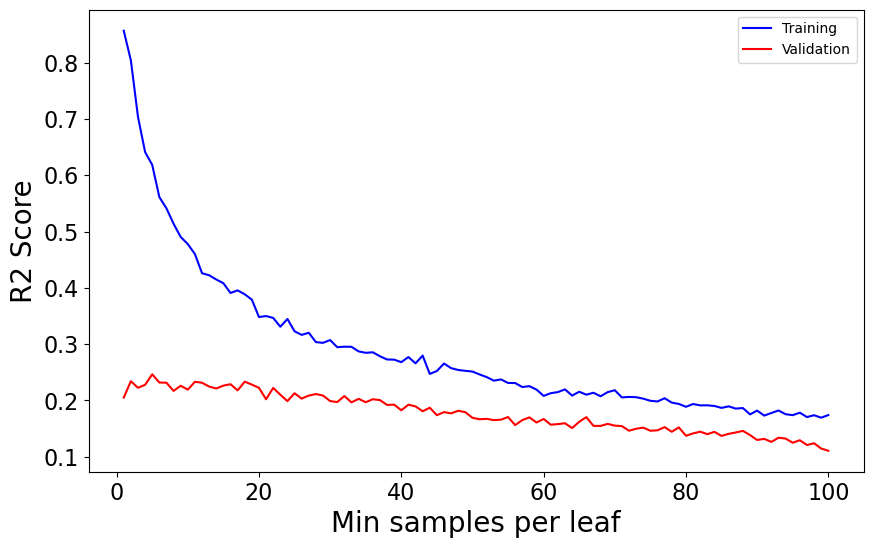

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_scores, 'b', label='Training')
plt.plot(range(1, 101), val_scores, 'r', label='Validation')
plt.xlabel('Min samples per leaf')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [36]:
n = np.argmax(val_scores) + 1
model = BaggingRegressor(estimator= DecisionTreeRegressor(min_samples_leaf=n))
model.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print("Training score:{:.2f}".format(train_score))
print("Testing score:{:.2f}".format(test_score))

Training score:0.61
Testing score:0.30


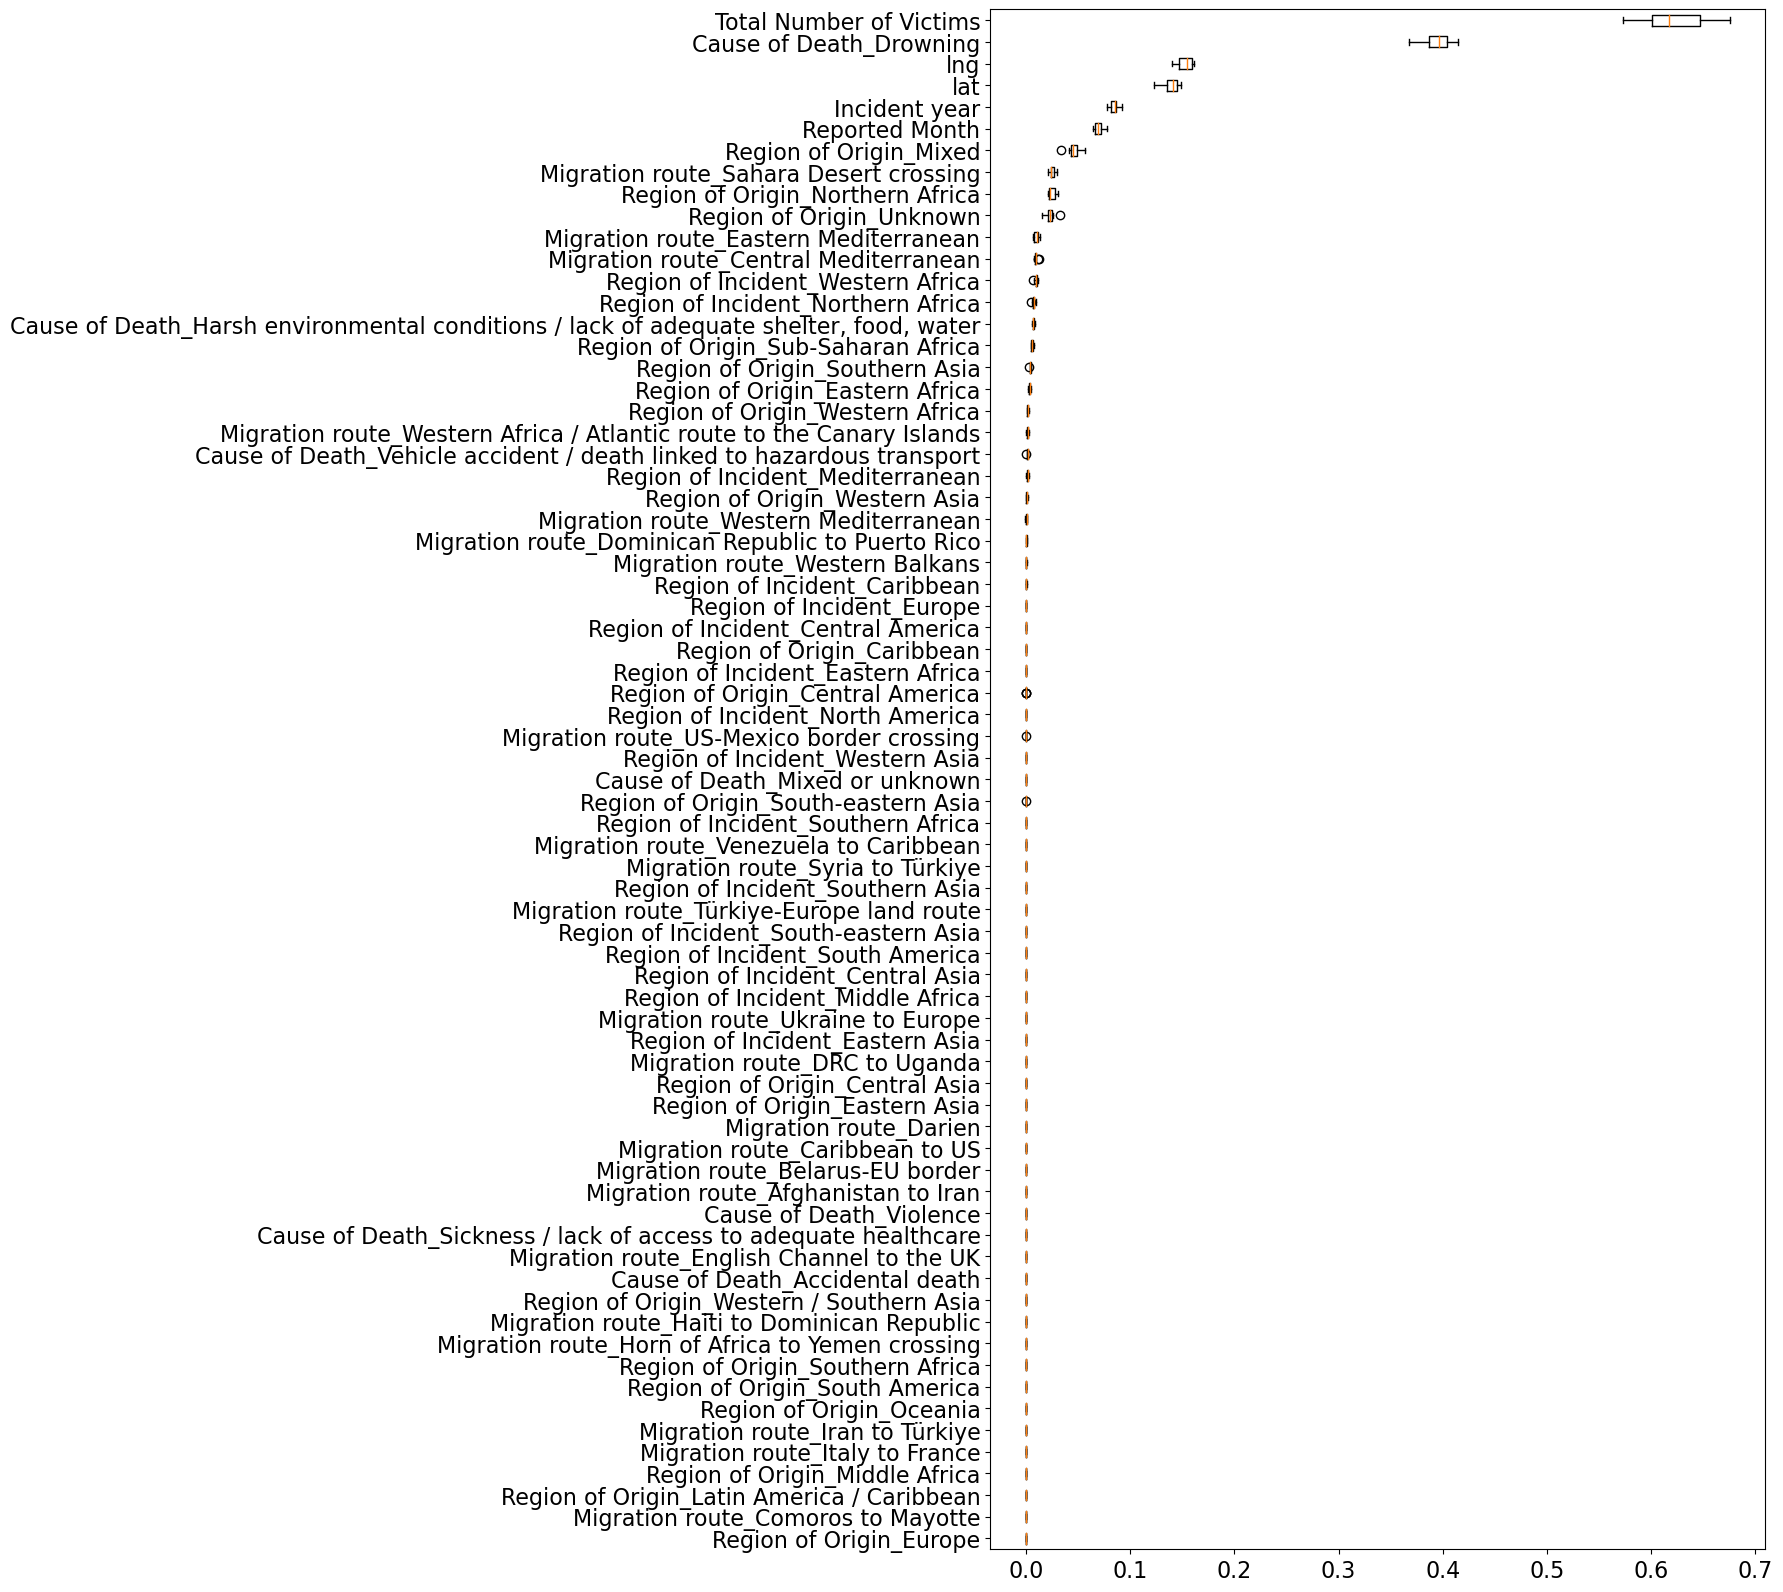

In [37]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 20))
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx],
)

plt.show()

In [38]:
# Reduce features with PCA
from sklearn.decomposition import PCA
val_scores = []
train_scores = []
for i in range(1, 72):
    pca = PCA(n_components = i)
    model = BaggingRegressor(estimator= DecisionTreeRegressor(min_samples_leaf=n))
    X_reduced = pca.fit_transform(X_train)
    model.fit(X_reduced,y_train)
    val_score = cross_val_score(model, X_reduced,y_train)
    train_score = model.score(X=X_reduced,y=y_train)
    train_scores.append(train_score)
    val_scores.append(np.mean(val_score))

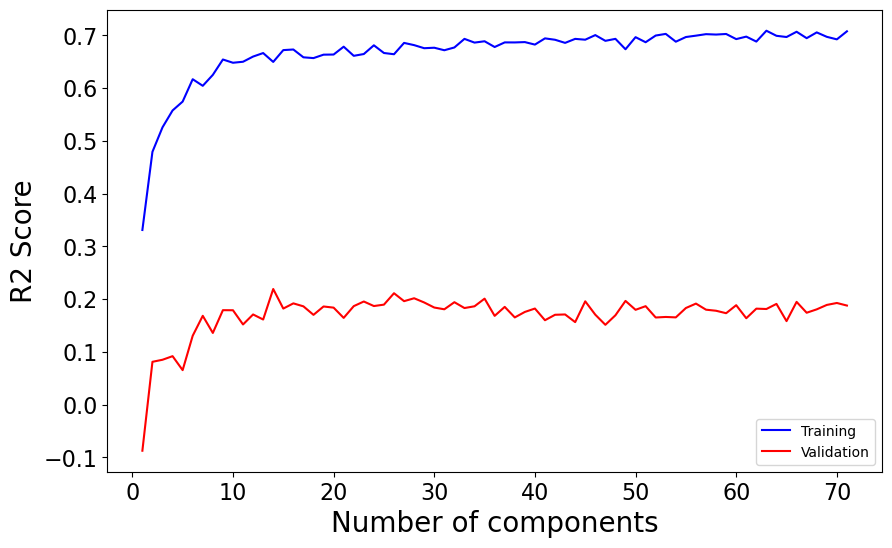

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 72), train_scores, 'b', label='Training')
plt.plot(range(1, 72), val_scores, 'r', label='Validation')
plt.xlabel('Number of components')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [41]:
# hand pick

Training score:0.66
Testing score:0.20
